In [1]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

(1797, 64)


<Figure size 432x288 with 0 Axes>

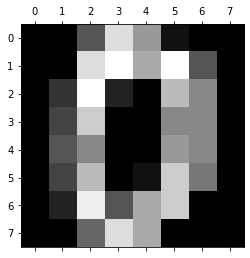

In [2]:
# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)
# Show one data
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

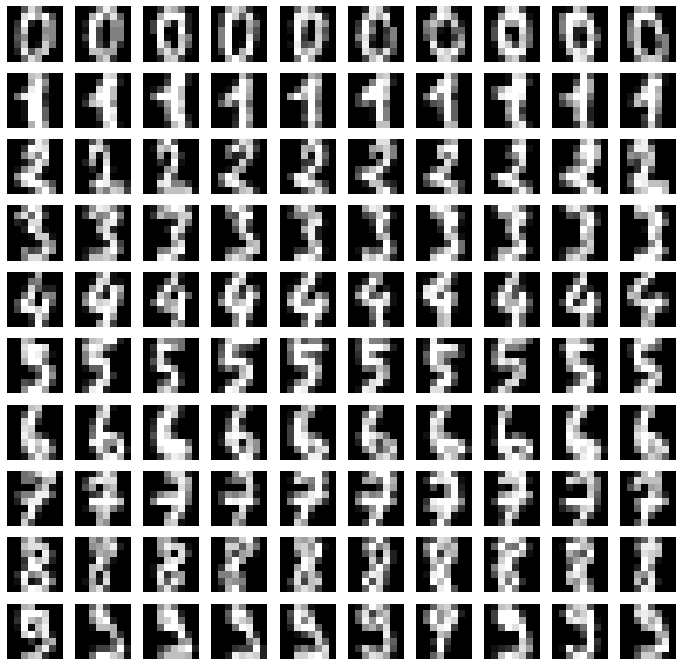

In [3]:
# Show several data for each label (== category) 
# Import some data
digits = load_digits()
x = digits.images
y = digits.target

n_digits = np.unique(y)
M = 10
dim = int(np.sqrt(x.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(x[y == d][j])
        axs[i,j].axis('off')

In [4]:
print(digits.DESCR)
#list of matrice

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### what is the type of the data ?

In [5]:
print(type(digits.images))
#It's a grid of values

<class 'numpy.ndarray'>


### How many pixel has one data instance ?

In [6]:
print(digits.images[0].shape)
#We got 64 values in one matrice 8colx8rows

(8, 8)


### What is the type of data of one pixel ? what does it represents ?

In [7]:
print(type(digits.images[0][0][0]))
#the type of one pixel is a float it represents a shade of grey

<class 'numpy.float64'>


### Write the equation of the **precision** and **recall** score and explicit what each terms represents.
precision: TP / (TP + FP)
recall : TP / (TP + FN)
### explain the purpose of the training set ?

It's purpose is to train the model, when we'll testing our model with the "testing set".
### explain the prpose of the testing set ?
It's purpose is to testing the model post establish by the training set.

In [8]:
# Import some data
digits = load_digits()
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

y7 = y
y7[y7 != 7] = 0
y7[y7 == 7] = 1

x_train, x_test, y7_train, y7_test = train_test_split(x, y7, test_size=0.20, random_state=0)

print('xtrain rows :',np.size(x_train))
print('xtest rows :',np.size(x_test))
print('ratio in % :', round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100,2)) 


xtrain rows : 91968
xtest rows : 23040
ratio in % : 20.03


In [10]:
from sklearn.metrics import recall_score , precision_score
loR = LogisticRegression(max_iter=1900)
loR7 = LogisticRegression(max_iter=1900)
# logisticRegr with allset
loR.fit(x_train, y_train)
# logisticRegr with num "7" 
loR7.fit(x_train, y7_train)

### check if theses models are equals
# print((loR.coef_ == loR7.coef_).sum())
# print(loR.coef_.shape)

loR.predict(x_test[0].reshape(1,-1))

pred = loR.predict(x_test)
pred7 = loR7.predict(x_test)

print('--Prediction base_set:',pred[:100],'\n')
print('--Recall_score base_set:',round(recall_score(y_test, pred, average ='micro'),3))
print('--Precision_score base_set:',round(precision_score(y_test, pred, average ='micro'),3),'\n')

print('--Predition 7set :',pred7[:100],'\n')
print('--Recall_score 7set:',round(recall_score(y7_test, pred7),3))
print('--Precision_score 7set:',round(precision_score(y7_test, pred7),3))

--Prediction base_set: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 3 7 5 1 2 8 9 3 1 4 7 4 8 5 8] 

--Recall_score base_set: 0.958
--Precision_score base_set: 0.958 

--Predition 7set : [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0] 

--Recall_score 7set: 0.949
--Precision_score 7set: 0.974


In [11]:
# logistic regression SVM 

x = digits.images.reshape((len(digits.images),-1))

clf = svm.SVC()
clf.fit(x_train,y_train)
predSVM = clf.predict(x_test)

print('--Prediction base_set:',pred[:100],'\n')
print('--Recall_score base_set:',round(recall_score(y_test, predSVM, average ='micro'),3))
print('--Precision_score base_set:',round(precision_score(y_test, predSVM, average ='micro'),3),'\n')

--Prediction base_set: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 9 3 7 5 1 2 8 9 3 1 4 7 4 8 5 8] 

--Recall_score base_set: 0.992
--Precision_score base_set: 0.992 

